In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp
import tensorflow
from tensorflow.keras.models import load_model

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.55, min_tracking_confidence=0.55) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>


c:\Users\Omkar Nirval\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
results

mediapipe.python.solution_base.SolutionOutputs

In [8]:
draw_landmarks(frame, results)

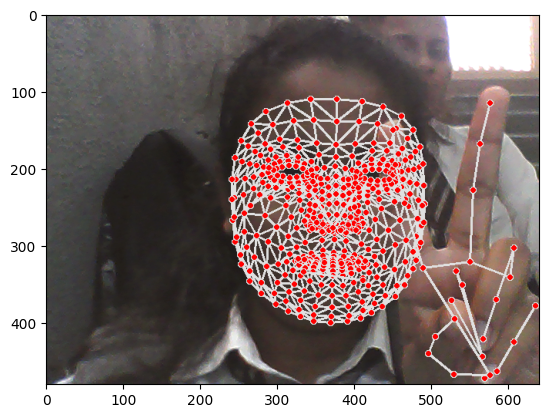

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)


In [13]:
import numpy as np
import math

def extract_keypoints(results, sequence_length=30):
    keypoints = []

    # Extract pose landmarks
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    keypoints.extend(pose)

    # Extract face landmarks
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    keypoints.extend(face)

    # Extract left hand landmarks
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    keypoints.extend(lh)

    # Extract right hand landmarks
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    keypoints.extend(rh)

    # Compute additional features
    if results.face_landmarks:
        face_center = np.mean(face.reshape(-1, 3), axis=0)
        lh_center = np.mean(lh.reshape(-1, 3), axis=0)
        rh_center = np.mean(rh.reshape(-1, 3), axis=0)

        lh_face_dist = np.linalg.norm(lh_center - face_center)
        rh_face_dist = np.linalg.norm(rh_center - face_center)
        lh_rh_dist = np.linalg.norm(lh_center - rh_center)

        # Calculate differences between finger tips
        lh_finger_tip = lh[16*3:17*3]  # Index finger tip
        rh_finger_tip = rh[16*3:17*3]  # Index finger tip
        finger_tip_diff = np.linalg.norm(lh_finger_tip - rh_finger_tip)

        # Calculate angle between finger tip and face
        lh_finger_to_face_vec = face_center - lh_finger_tip
        rh_finger_to_face_vec = face_center - rh_finger_tip
        lh_finger_face_angle = math.acos(np.dot(lh_finger_to_face_vec, [0, 1, 0]) / (np.linalg.norm(lh_finger_to_face_vec) * 1))
        rh_finger_face_angle = math.acos(np.dot(rh_finger_to_face_vec, [0, 1, 0]) / (np.linalg.norm(rh_finger_to_face_vec) * 1))
    else:
        lh_face_dist, rh_face_dist, lh_rh_dist, finger_tip_diff, lh_finger_face_angle, rh_finger_face_angle = 0, 0, 0, 0, 0, 0

    keypoints.extend([lh_face_dist, rh_face_dist, lh_rh_dist, finger_tip_diff, lh_finger_face_angle, rh_finger_face_angle])

    return np.array(keypoints)


In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.58152026,  0.5773499 , -1.70888257, ...,  1.26340875,
        2.30752269,  0.8156577 ])

In [16]:
result_test.shape

(1668,)

In [17]:
np.save('000', result_test)

In [18]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Sign_Data') 

# Actions that we try to detect
actions = np.array(['chhan', 'dhanyawad', 'ghar', 'ho', 'i_love_you', 'jevan', 'nahi', 'namaskar', 'pani', 'sorry'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

In [19]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [19]:
cap = cv2.VideoCapture(0)

# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.55, min_tracking_confidence=0.55) as holistic:
    
    # Loop through actions
    for action in actions:
        
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
        # Wait for user input before moving to the next action
        input("Press Enter to continue to the next action...")
        
    cap.release()
    cv2.destroyAllWindows()

: 

In [19]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [20]:
label_map = {label:num for num, label in enumerate(actions)}

In [21]:
label_map

{'chhan': 0,
 'dhanyawad': 1,
 'ghar': 2,
 'ho': 3,
 'i_love_you': 4,
 'jevan': 5,
 'nahi': 6,
 'namaskar': 7,
 'pani': 8,
 'sorry': 9}

In [22]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

FileNotFoundError: [Errno 2] No such file or directory: 'Sign_Data\\chhan\\0\\0.npy'

In [23]:
np.array(sequences).shape

(0,)

In [24]:
np.array(labels).shape

(0,)

In [25]:
X = np.array(sequences)

In [26]:
X.shape

(0,)

In [127]:
y = to_categorical(labels).astype(int)

In [128]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10)

In [39]:
y_test.shape

(33, 11)

In [131]:
X_train.shape

(270, 30, 1668)

In [132]:
np.save('X_train2',X_train)
np.save('X_test2',X_test)
np.save('y_train2',y_train)
np.save('y_test2',y_test)

In [22]:
X_train = np.load('X_train2.npy')
X_test = np.load('X_test2.npy')
y_train = np.load('y_train2.npy')
y_test = np.load('y_test2.npy')

In [22]:
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import TensorBoard

In [40]:

model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True, activation='sigmoid'), input_shape=(30, 1668)))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(64, return_sequences=True, activation='sigmoid')))
model.add(Dropout(0.1))
model.add(Bidirectional(LSTM(32, return_sequences=False, activation='sigmoid')))
model.add(Dense(128, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(64, activation='sigmoid'))
model.add(Dropout(0.1))
model.add(Dense(10, activation='softmax'))


In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=200)

Epoch 1/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 12s 214ms/step - categorical_accuracy: 0.0970 - loss: 2.4782
Epoch 2/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 208ms/step - categorical_accuracy: 0.0828 - loss: 2.4208
Epoch 3/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 212ms/step - categorical_accuracy: 0.0698 - loss: 2.4217
Epoch 4/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 239ms/step - categorical_accuracy: 0.0783 - loss: 2.4577
Epoch 5/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - categorical_accuracy: 0.0894 - loss: 2.4259
Epoch 6/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 206ms/step - categorical_accuracy: 0.0861 - loss: 2.4040
Epoch 7/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 215ms/step - categorical_accuracy: 0.0971 - loss: 2.4070
Epoch 8/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 228ms/step - categorical_accuracy: 0.1178 - loss: 2.3912
Epoch 9/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 235ms/step - categorical_accuracy: 0.1259 - loss: 2.3873
Epoch 10/200
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 248ms/step - categorical_accuracy: 0.2112 - loss: 2.3151
Epoch 11

In [26]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


In [27]:
actions[np.argmax(res[15])]

'namaskar'

In [28]:
actions[np.argmax(y_test[15])]

'namaskar'

In [49]:
model.save('nd_model11.keras')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Average Precision: 1.00
Average Recall: 1.00
Average F1 Score: 1.00


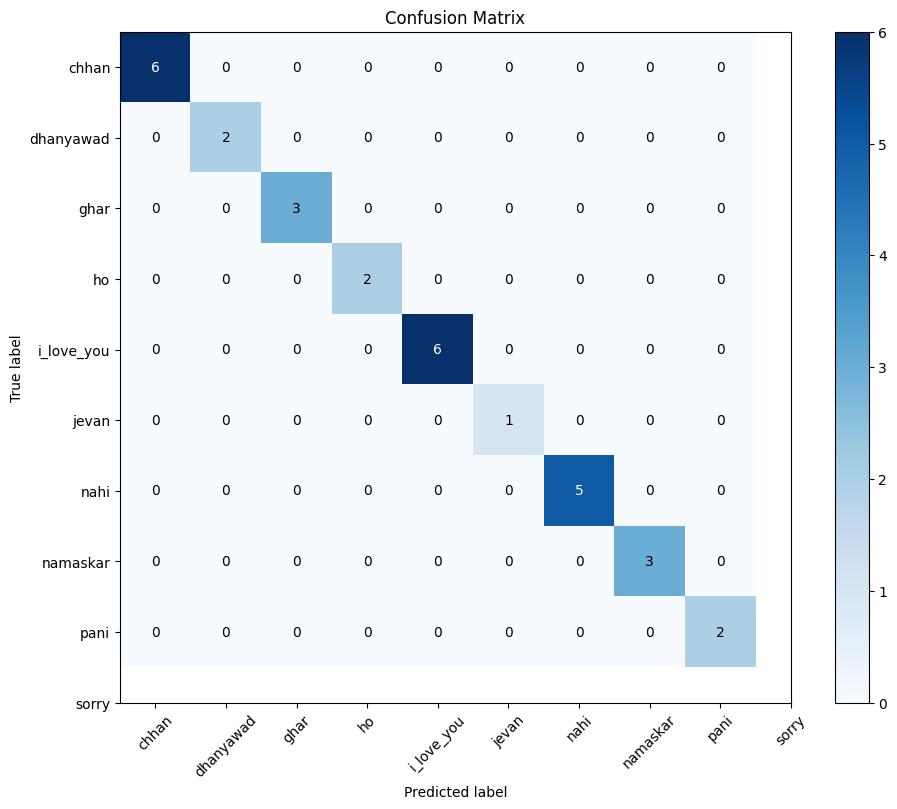

In [33]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
import matplotlib.pyplot as plt

y_pred = model.predict(X_test)
y_true = np.argmax(y_test, axis=1)

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, np.argmax(y_pred, axis=1), average='macro')

print(f"Average Precision: {precision:.2f}")
print(f"Average Recall: {recall:.2f}")
print(f"Average F1 Score: {f1_score:.2f}")

# Compute confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pred, axis=1))

# Plot confusion matrix
plt.figure(figsize=(10, 8))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(actions))
plt.xticks(tick_marks, actions, rotation=45)
plt.yticks(tick_marks, actions)

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'), ha="center", va="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [36]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score
y_pred = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(y_pred, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[[24,  0],
        [ 0,  6]],

       [[28,  0],
        [ 0,  2]],

       [[27,  0],
        [ 0,  3]],

       [[28,  0],
        [ 0,  2]],

       [[24,  0],
        [ 0,  6]],

       [[29,  0],
        [ 0,  1]],

       [[25,  0],
        [ 0,  5]],

       [[27,  0],
        [ 0,  3]],

       [[28,  0],
        [ 0,  2]]], dtype=int64)

In [37]:
accuracy_score(ytrue, yhat)

1.0

In [23]:
from tensorflow.keras.layers import LSTM

model = load_model('nd_model1.keras')

In [24]:
import cv2
import numpy as np

# 1. New detection variables
sequence = []
sentence = []
predictions = []
max_sequence_length = 30  # Maximum expected sequence length
min_sequence_length = 10  # Minimum sequence length for prediction
threshold = 0.90  # Threshold for prediction confidence
previous_landmarks = None  # Store previous landmarks for motion detection
max_sentence_length = 4  # Maximum number of words to display

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.55, min_tracking_confidence=0.55) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Motion detection
        current_landmarks = extract_keypoints(results)
        if previous_landmarks is not None:
            landmark_diff = np.abs(current_landmarks - previous_landmarks).sum()
            if landmark_diff < 0.01:  # Adjust this threshold as needed
                previous_landmarks = current_landmarks
                continue  # Skip prediction if there is no significant movement

        previous_landmarks = current_landmarks

        # 3. Prediction logic
        keypoints = current_landmarks
        sequence.append(keypoints)

        # Dynamic sequence length detection
        if len(sequence) > max_sequence_length:
            sequence = sequence[-max_sequence_length:]

        if len(sequence) >= min_sequence_length:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # Check if a complete gesture is detected
            if len(predictions) >= min_sequence_length:
                most_frequent_prediction = max(set(predictions[-min_sequence_length:]), key=predictions[-min_sequence_length:].count)
                if predictions.count(most_frequent_prediction) >= int(min_sequence_length * threshold):
                    predicted_action = actions[most_frequent_prediction]
                    if len(sentence) == max_sentence_length:
                        sentence.pop(0)  # Remove the oldest word
                    sentence.append(predicted_action)
                    predictions = []  # Reset predictions after a complete gesture

        # 4. Viz logic
        cv2.rectangle(image, (0, 0), (640, 80), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (2, 60), cv2.FONT_HERSHEY_DUPLEX, 1.0, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close the OpenCV window
    cap.release()
    cv2.destroyAllWindows()


c:\Users\Omkar Nirval\AppData\Local\Programs\Python\Python312\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 799ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
<class 'media

In [46]:
import cv2
import numpy as np
import time  # Import the time module

# 1. New detection variables
sequence = []
sentence = []
predictions = []
max_sequence_length = 30  # Maximum expected sequence length
min_sequence_length = 10  # Minimum sequence length for prediction
threshold = 0.90  # Threshold for prediction confidence
previous_landmarks = None  # Store previous landmarks for motion detection
max_sentence_length = 2  # Maximum number of words to display
pause_time = 3  # Pause time in seconds
last_detected_time = 0  # Time when the last gesture was detected

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(min_detection_confidence=0.55, min_tracking_confidence=0.55) as holistic:
    while cap.isOpened():
        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)

        # Draw landmarks
        draw_styled_landmarks(image, results)

        # 2. Motion detection
        current_landmarks = extract_keypoints(results)
        if previous_landmarks is not None:
            landmark_diff = np.abs(current_landmarks - previous_landmarks).sum()
            if landmark_diff < 0.01:  # Adjust this threshold as needed
                previous_landmarks = current_landmarks
                continue  # Skip prediction if there is no significant movement

        previous_landmarks = current_landmarks

        # 3. Check for pause period
        current_time = time.time()
        if current_time - last_detected_time < pause_time:
            # If within pause period, just display the current frame with the sentence
            cv2.putText(image, ' '.join(sentence), (10, 50), cv2.FONT_HERSHEY_DUPLEX, 1.0, (255, 255, 255), 2, cv2.LINE_AA)
            cv2.imshow('OpenCV Feed', image)
            if cv2.waitKey(1) & 0xFF == ord('q'):
                break
            continue

        # 4. Prediction logic
        keypoints = current_landmarks
        sequence.append(keypoints)

        # Dynamic sequence length detection
        if len(sequence) > max_sequence_length:
            sequence = sequence[-max_sequence_length:]

        if len(sequence) >= min_sequence_length:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            predictions.append(np.argmax(res))

            # Check if a complete gesture is detected
            if len(predictions) >= min_sequence_length:
                most_frequent_prediction = max(set(predictions[-min_sequence_length:]), key=predictions[-min_sequence_length:].count)
                if predictions.count(most_frequent_prediction) >= int(min_sequence_length * threshold):
                    predicted_action = actions[most_frequent_prediction]
                    if len(sentence) == max_sentence_length:
                        sentence.pop(0)  # Remove the oldest word
                    sentence.append(predicted_action)
                    
                    # Reset sequence and predictions after a complete gesture
                    sequence = []
                    predictions = []

                    # Update the last detected time
                    last_detected_time = current_time

        # 5. Viz logic
        # Display the words without background
        cv2.putText(image, ' '.join(sentence), (10, 50), cv2.FONT_HERSHEY_DUPLEX, 1.0, (255, 255, 255), 2, cv2.LINE_AA)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    # Release the camera and close the OpenCV window
    cap.release()
    cv2.destroyAllWindows()


<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
<class 'mediapipe.python.solution_base.SolutionOutputs'>
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
<class 'medi